# Problem Set 2

In [83]:
using Random, Distributions
using Plots
# using PlotlyJS
# using StatsPlots
using DataFrames
gr()
using StatsBase
using DelimitedFiles
using LinearAlgebra
# using DataStructures
using Distances

## 1) Sampling from a Gaussian distribution

Generate normal distribution with mu = 2 and sigma = 3

In [5]:
gaussian = Normal(2,3)

Normal{Float64}(μ=2.0, σ=3.0)

Take 2000 random samples from gaussian

In [7]:
samples = rand(gaussian,2000)

2000-element Vector{Float64}:
  1.0772681047835686
  4.092223685828667
  9.16206931965427
  2.2625031894764707
  0.2280966754810949
 -0.38338281190228773
 -0.13832959267218214
  4.106547192872412
  7.461302718163332
  2.729624229374793
  3.5556817663436644
  1.282075325149567
  3.7450461634818586
  ⋮
  2.798139030326813
  3.6262301128445653
 -2.783556238566491
 -2.89256416290765
  4.595191543834542
  1.6019717243246392
  0.8940275610697579
  1.8793414374368826
  1.081303440460021
 -1.1454185193795317
 -0.9486767844831387
  3.105751944373297

Fit a histogram to samples with 35 bins

In [12]:
hist = fit(Histogram, samples, nbins=35, closed=:left)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  -9.0:1.0:12.0
weights: [1, 3, 4, 17, 21, 50, 83, 141, 199, 225  …  263, 219, 178, 141, 77, 50, 25, 19, 11, 3]
closed: left
isdensity: false

Frequency Histogram

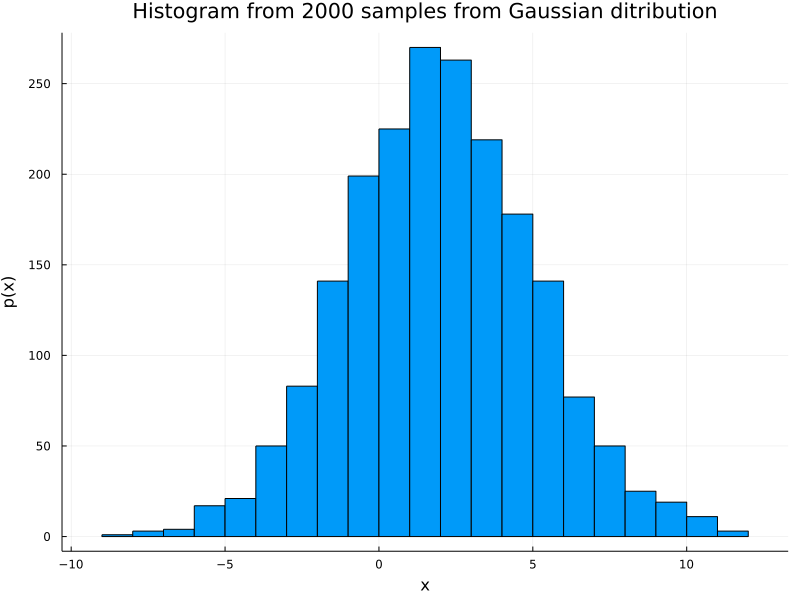

In [49]:
plot(hist,size=(800,600),legend=false)
title!("Histogram from 2000 samples from Gaussian ditribution")
xlabel!("x")
ylabel!("p(x)")

Normalize histogram into PDF

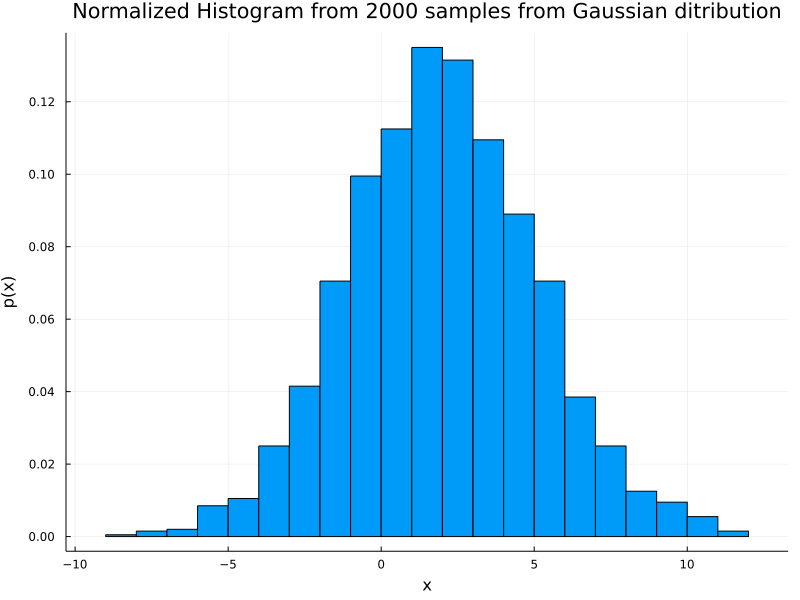

In [48]:
norm_hist = normalize(hist, mode=:pdf)
plot(norm_hist,size=(800,600),legend=false)
title!("Normalized Histogram from 2000 samples from Gaussian ditribution")
xlabel!("x")
ylabel!("p(x)")

Proof that integral = 1

In [18]:
norm(norm_hist) #calculated absolute value of integral of normalized histogram

0.9999999999999997

## 2)

Frequencies for each amino acid sampled from uniform frequency distribution

In [25]:
protein  = rand(range(1,20),300) #take 300 random samples from a uniform distribution of 1:20
aa_symbols =["Ala", "Arg", "Asn", "Asp", "Cys", "Gln", "Glu", "Gly", "His", "Ile", "Leu", "Lys", "Met", "Phe", "Pro", "Ser", "Thr", "Trp", "Tyr", "Val"] #list for symbols for each amino acid
countlist = [count(i->i==x,protein) for x in range(1,20)] #count the amount of observations for each amino acid from sample
freqdict = Dict(aa=>n for (aa,n) in zip(aa_symbols,countlist)) #map amino acid to count

Dict{String, Int64} with 20 entries:
  "Met" => 20
  "Trp" => 17
  "Leu" => 17
  "Gly" => 15
  "Gln" => 17
  "Lys" => 9
  "His" => 9
  "Ala" => 20
  "Pro" => 21
  "Asp" => 10
  "Phe" => 17
  "Cys" => 16
  "Ser" => 10
  "Thr" => 17
  "Glu" => 12
  "Tyr" => 13
  "Val" => 15
  "Ile" => 15
  "Arg" => 19
  "Asn" => 11

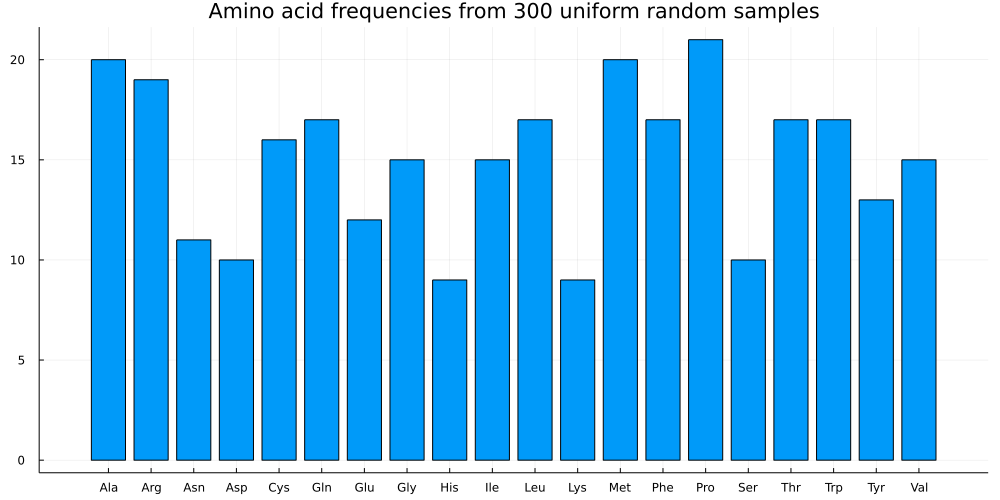

In [41]:
bar(countlist,xticks=(1:20,aa_symbols),size = (1000,500),legend=false)
title!("Amino acid frequencies from 300 uniform random samples")

In [34]:
aa_labels = Dict(zip(aa_symbols,collect(1:20))) #map index to amino acid
res_freqs = FrequencyWeights([8.25,5.53,4.06,5.45,1.37,3.93,6.75,7.07,2.27,5.96,9.66,5.84,2.42,3.86,4.70,6.56,5.34,1.08,2.92,6.87]) #input known residue frequencies
res_freqs = FrequencyWeights([x/100 for x in res_freqs]) #normalize 
cum_res_freqs = accumulate(+,res_freqs) #accumulate for cumulative distribution

20-element Vector{Float64}:
 0.0825
 0.1378
 0.1784
 0.2329
 0.24659999999999999
 0.2859
 0.3534
 0.4241
 0.4468
 0.5064
 0.603
 0.6614
 0.6856
 0.7242
 0.7712
 0.8368
 0.8902
 0.901
 0.9302
 0.9989

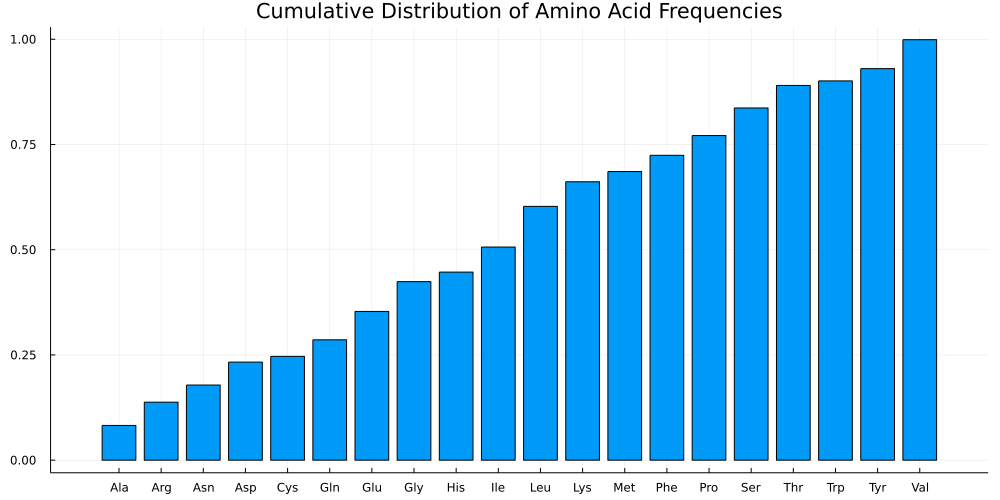

In [40]:
bar(accumulate(+,res_freqs),xticks=(1:20,aa_symbols),size=(1000,500), legend=false)
title!("Cumulative Distribution of Amino Acid Frequencies")

In [91]:
aa_counts = Dict()
for i = collect(1:300)
    aa = sample(aa_symbols,res_freqs)
    aa_counts[aa] = get(aa_counts,aa,0) + 1
end
map!(x->x/3, values(aa_counts))
aa_counts

Dict{Any, Any} with 20 entries:
  "Gln" => 3.66667
  "Ala" => 8.0
  "Cys" => 1.66667
  "Ser" => 8.66667
  "Thr" => 6.33333
  "Glu" => 8.0
  "Tyr" => 4.0
  "Ile" => 5.0
  "Met" => 4.33333
  "Asn" => 2.0
  "Trp" => 1.66667
  "Leu" => 6.33333
  "Gly" => 8.66667
  "Lys" => 4.66667
  "His" => 1.66667
  "Pro" => 4.0
  "Asp" => 4.0
  "Phe" => 4.0
  "Val" => 7.33333
  "Arg" => 6.0

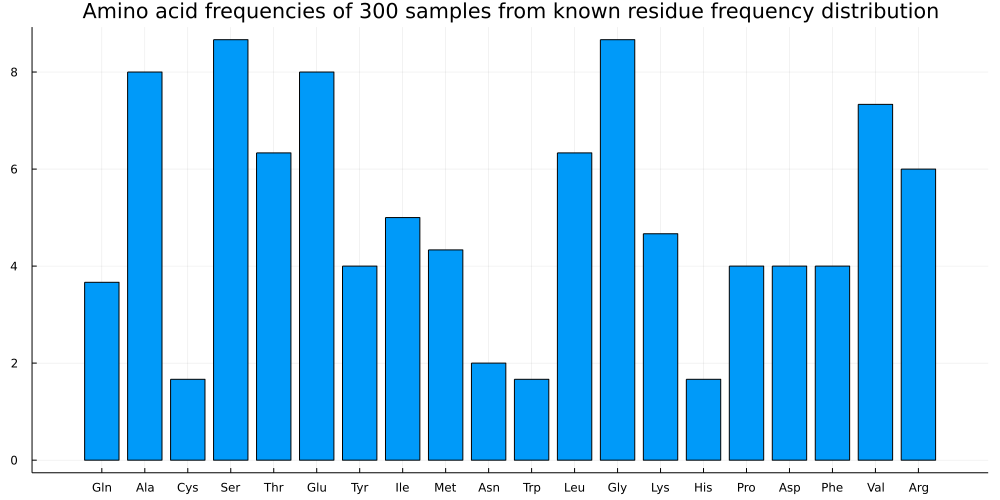

In [93]:
bar(collect(values(aa_counts)),xticks=(1:20,collect(keys(aa_counts))),size=(1000,500),legend=false)
title!("Amino acid frequencies of 300 samples from known residue frequency distribution")

Error between sampled frequencies and known frequencies

In [95]:
ordered_counts = [aa_counts[x] for x in aa_symbols]
norm(ordered_counts-res_freqs)

24.33040067115396

## Monte Carlo

In [ ]:
# 1. choose initial state x
# 2. Generate move from a distribution to a newstate g(x->x') must be reversible otherwise won't be equilibrium
# 3. Accept or reject this move according to some probability that you compare to a URN
# 4. Store new state (either x' or x)
# 5. Forward move in configuration must be equally likely as going back to original state

In [153]:
coords = readdlm("init_crds_boxl_3.5.dat")
lj_df = DataFrame(coords,[:x,:y,:z])

,x,y,z
,Float64,Float64,Float64
1,-1.20196,0.0493745,1.34467
2,0.957627,0.115361,-1.35331
3,-0.188974,0.523728,-1.36514
4,-1.61991,-0.0409586,0.190333
5,1.5412,-0.756257,-1.0001
6,-1.11554,-1.66646,-0.990655
7,-0.703262,-0.135565,-0.212298
8,1.05415,1.37549,-1.37649
9,-0.0243404,0.0902458,0.676829


In [12]:
norm(lj_df[1,:])

1.8042419378566323

In [137]:
function calc_LJ(r)
    4*0.25((1/r)^12 - (1/r)^6)
end

calc_LJ (generic function with 1 method)

In [156]:
w=repeat([7],3) 
R = pairwise(PeriodicEuclidean(w),coords,dims=1)
R = calc_LJ.(R) 
replace!(R,NaN=>0)

30×30 Matrix{Float64}:
  0.0          -0.000586057  -0.00157287   …  -0.0025305    -0.00624322
 -0.000586057   0.0          -0.212934        -0.00188957   -0.240546
 -0.00157287   -0.212934      0.0             -0.000957989   0.677719
 -0.204798     -0.00134688   -0.00903884      -0.000704205  -0.0177799
 -0.000391148  -0.248069     -0.00915675      -0.00196689   -0.0283627
 -0.00168116   -0.00226887   -0.00511031   …  -0.000174761  -0.00528362
 -0.0478682    -0.0140601    -0.105491        -0.00210157   -0.0989895
 -0.000345222  -0.185055     -0.0780909       -0.00188273   -0.0497017
 -0.135743     -0.0075417    -0.0117222       -0.0356463    -0.203219
 -0.00121132   -0.15647      -0.0662326       -0.00147088   -0.189154
 -0.0410013    -0.00249269   -0.0159208    …  -0.0044071    -0.0479614
 -0.00293519   -0.0305063    -0.216602        -0.00435706   -0.249335
 -0.00750864   -0.00636416   -0.00258485      -0.249657     -0.0320214
  ⋮                                        ⋱             

In [157]:
sum(R)

-32.8073533484767

In [41]:
function get_pair_distances(ptidx)
    diffs = coords[ptidx,:] .- transpose(coords[ptidx+1:end,:])
    if all(diffs->(diffs ≤ ))
    [norm(col) for col in eachcol(diffs)]
end

get_pair_distances (generic function with 1 method)

In [45]:
get_pair_distances(1)

29-element Vector{Float64}:
 3.456481078446118
 2.931592056598482
 1.2309891273413962
 3.6975570828342064
 2.8991886632111057
 1.6453120247466553
 3.7753611444934965
 1.3544285696524814
 3.062213857278008
 1.6905634585703102
 2.6414793163659778
 2.2569575152584256
 1.8738468384248586
 ⋮
 3.552079376191212
 1.854714050603847
 2.1547979943933377
 2.741125539530437
 2.5032931724167096
 1.8584013362560234
 3.0155605397608625
 1.0649359352927719
 1.0241814456358849
 2.7083421738380893
 2.7077912826507187
 2.3279612359141684

In [40]:
length(eachrow(lj_df))

30

In [51]:
pairs_distances = [idx=>get_pair_distances(idx) for idx in collect(1:length(eachrow(coords))-1)]

29-element Vector{Pair{Int64, Vector{Float64}}}:
  1 => [3.456481078446118, 2.931592056598482, 1.2309891273413962, 3.6975570828342064, 2.8991886632111057, 1.6453120247466553, 3.7753611444934965, 1.3544285696524814, 3.062213857278008, 1.6905634585703102  …  2.1547979943933377, 2.741125539530437, 2.5032931724167096, 1.8584013362560234, 3.0155605397608625, 1.0649359352927719, 1.0241814456358849, 2.7083421738380893, 2.7077912826507187, 2.3279612359141684]
  2 => [1.2172090454038025, 3.0084843465093862, 1.1068147275188398, 2.7576141545453536, 2.0306203628443673, 1.2640356984494319, 2.2552928946269493, 1.0366361660387624, 2.7146097689133377, 1.779447642738368  …  2.4118290327254313, 1.9666157673228217, 1.6254072228931902, 3.2288031238867863, 2.2593851731857493, 3.2070928659399964, 2.975661366807144, 1.550715000543221, 2.8431668704350304, 1.1636536468410548]
  3 => [2.187683754467474, 2.1829192290115005, 2.4074249470050497, 1.4241516842150606, 1.5069771816652158, 2.093957444101512, 1.55286066

In [136]:
function calc_LJ(r)
    4*0.25((1/r)^12 - (1/r)^6)
end

calc_LJ (generic function with 1 method)

In [52]:
for x in pairs_distances
    calc_LJ(x)

1 => [3.456481078446118, 2.931592056598482, 1.2309891273413962, 3.6975570828342064, 2.8991886632111057, 1.6453120247466553, 3.7753611444934965, 1.3544285696524814, 3.062213857278008, 1.6905634585703102  …  2.1547979943933377, 2.741125539530437, 2.5032931724167096, 1.8584013362560234, 3.0155605397608625, 1.0649359352927719, 1.0241814456358849, 2.7083421738380893, 2.7077912826507187, 2.3279612359141684]

In [53]:
reduce(+,[1,2,3])

6

In [59]:
calc_LJ(2.931592056598482)

-0.00157287451035486

In [62]:
calc_LJ.([1,2,3];[4,5,6])

LoadError: syntax: invalid keyword argument syntax "[4, 5, 6]" around In[62]:1

In [64]:
[[1,2,3];[4,5,6]]

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [65]:
sum(calc_LJ, [1,2,3])

-0.016750719811059692